In [1122]:
import numpy as np
import matplotlib.pyplot as plt
class LinearRegression():
  def __init__(self,lr=1e-6,num_epochs=100000):
    self.lr = lr
    self.num_epochs = num_epochs
    self.weights = None
    self.bias = None
    self.costs = []
  def fit(self,X,y):
        
    m,n = X.shape
    
    #initialize weights
    self.weights = np.zeros((n,1))
    self.bias = 0


    #starting gradient descent
    for _ in range(self.num_epochs):
      #compute predicted y
      hypothesis = np.dot(X,self.weights) + self.bias
      
      y = y.reshape(m,1)
      
      #computing loss
      loss = hypothesis - y
      
      #compute cost function for all of training data
      general_cost_function = np.sum(loss**2)/2*m
      self.costs.append(general_cost_function)
      
      #updating weights
      dw = np.dot((X.T),loss)/m
      db = np.sum(loss)/m
      
      
      #updating weights of model
      self.weights -= self.lr * dw
      self.bias -= self.lr * db
  def predict(self,X):
      return X.dot(self.weights) + self.bias
    
  def plot_cost(self):
      plt.plot(self.costs) 
       
  def get_model_params(self):
    return self.weights,self.bias 

In [1123]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [1124]:
X,y = load_boston(return_X_y=True)

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Ca

In [1125]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [1126]:
y_train.shape

(404,)

In [1127]:
l = LinearRegression()
l.fit(X_train,y_train)

In [1128]:
mean_squared_error(l.predict(X_test),y_test)

56.66063655207546

In [1129]:
l.predict(X_test)

array([[19.43867655],
       [26.71214234],
       [25.31913601],
       [17.90723278],
       [20.25167971],
       [24.21280191],
       [21.19025263],
       [24.05663014],
       [15.84538477],
       [15.16254011],
       [-1.56266634],
       [ 6.84069737],
       [19.50359782],
       [12.29183173],
       [31.24060988],
       [28.95390552],
       [23.3782524 ],
       [33.70160171],
       [22.90547567],
       [22.01747872],
       [24.65388949],
       [21.75543291],
       [23.70669206],
       [26.76710762],
       [19.42955516],
       [14.16289695],
       [24.32607845],
       [16.24634766],
       [30.08266608],
       [22.19908035],
       [20.93285441],
       [22.76787852],
       [28.05506823],
       [25.64298114],
       [26.43795791],
       [22.00832562],
       [13.93038025],
       [25.27377008],
       [ 9.91619754],
       [14.7086521 ],
       [17.83482642],
       [16.75396567],
       [19.71016266],
       [19.65886755],
       [23.88552595],
       [25

In [1130]:
l.get_model_params()

(array([[-0.13125891],
        [ 0.12663108],
        [-0.0999133 ],
        [ 0.03044887],
        [ 0.02079027],
        [ 0.52174849],
        [ 0.11721121],
        [ 0.04013683],
        [ 0.04462856],
        [ 0.00155629],
        [ 0.30789614],
        [ 0.03492526],
        [-0.6774168 ]]),
 0.04886118763707201)

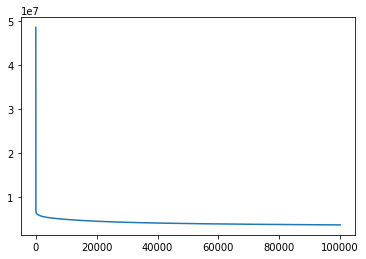

In [1134]:
#plotting cost function for each epoch
l.plot_cost()